## Decision Tree - Fraud check Dataset

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [4]:
fraud = pd.read_csv('Downloads/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### EDA

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud[fraud.duplicated()].shape

(0, 6)

In [8]:
fraud_1 = pd.get_dummies(fraud, columns=["Undergrad", "Marital.Status", "Urban"], drop_first=True)
fraud_1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


##### Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [9]:
print({"Min":fraud_1["Taxable.Income"].min(), "Max":fraud_1["Taxable.Income"].max()})

{'Min': 10003, 'Max': 99619}


In [10]:
fraud_1["Tax_Inc"] = pd.cut(fraud_1["Taxable.Income"], bins = [10002,30000,99620], labels=["Risky", "Good"])
fraud_1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Inc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [11]:
fraud_2 = pd.get_dummies(fraud_1, columns=["Tax_Inc"], drop_first=True)
fraud_2.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Inc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


### Normalization

In [13]:
def norm_func (i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
fraud_norm = norm_func(fraud_2.iloc[:,1:])
fraud_norm.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_Inc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


### Train & Test Split

In [15]:
x = fraud_norm.drop(["Tax_Inc_Good"], axis=1)
y = fraud_norm["Tax_Inc_Good"]

In [16]:
x.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0


In [17]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Tax_Inc_Good, dtype: float64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 5)

### Building Decision Tree using "C5.0"

In [19]:
model_1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

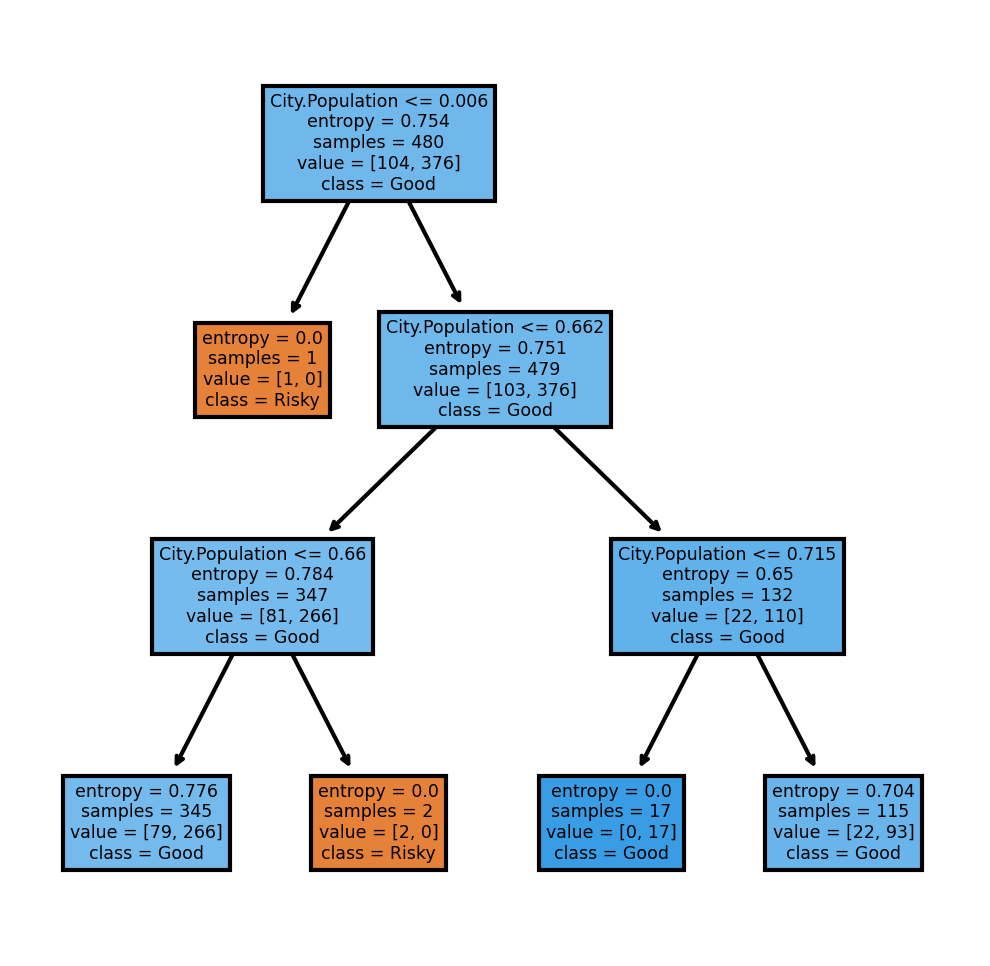

In [20]:
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single', 'Urban_YES']
cn=["Risky", "Good"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(model_1, feature_names=fn, class_names=cn, filled=True);

In [21]:
pred = model_1.predict(x_test)
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [22]:
pd.crosstab(y_test, pred)

col_0,0.0,1.0
Tax_Inc_Good,,
0.0,0,20
1.0,1,99


In [23]:
np.mean(pred==y_test)*100

82.5

In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        20
         1.0       0.83      0.99      0.90       100

    accuracy                           0.82       120
   macro avg       0.42      0.49      0.45       120
weighted avg       0.69      0.82      0.75       120



### Building Decision Tree using "CART"

In [25]:
model_2 = DecisionTreeClassifier(criterion="gini", max_depth=3)
model_2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

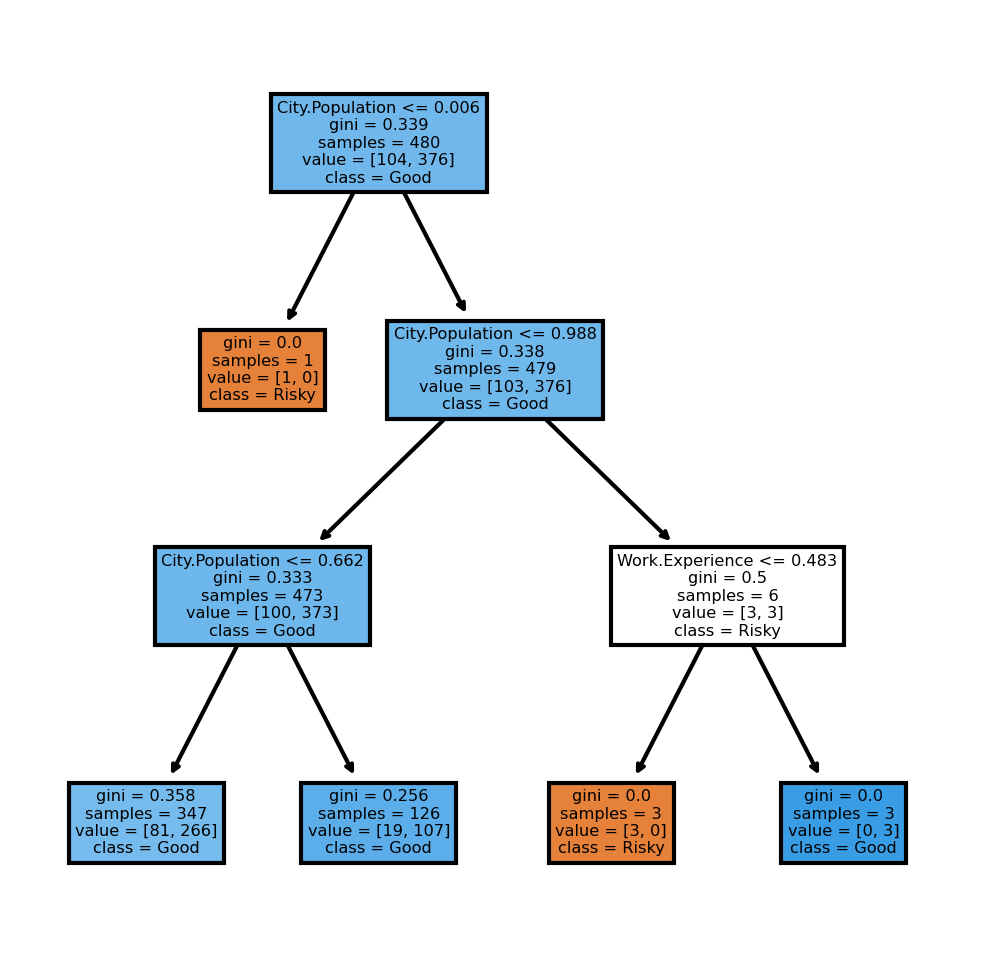

In [26]:
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single', 'Urban_YES']
cn=["Risky", "Good"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(model_2, feature_names=fn, class_names=cn, filled=True);

In [27]:
preds = model_1.predict(x_test)
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [28]:
pd.crosstab(y_test, pred)

col_0,0.0,1.0
Tax_Inc_Good,,
0.0,0,20
1.0,1,99


In [29]:
np.mean(pred==y_test)*100

82.5

In [30]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        20
         1.0       0.83      0.99      0.90       100

    accuracy                           0.82       120
   macro avg       0.42      0.49      0.45       120
weighted avg       0.69      0.82      0.75       120



### Output Result:
##### 1. We have prepared the decision tree model,on fraud data treating those who have                taxable income <= 30000 as "Risky" and others are "Good".
##### 2. We have prepared model_1 and model_2 using both Entropy and Gini Impurity                    methods respectively.
##### 3. We have got similar accuracy score for both the models as 82.5%.